<a href="https://colab.research.google.com/github/VitikaJain25/Data_Science/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

data = pd.read_csv(io.BytesIO(uploaded['gender_voice_dataset.csv']))
# To predict gender based on various characteristics of person's voice

Saving gender_voice_dataset.csv to gender_voice_dataset.csv


In [4]:
data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
925,0.190720,0.059821,0.186512,0.141620,0.243901,0.102281,1.360220,4.716952,0.920968,0.467346,0.243438,0.190720,0.144614,0.048583,0.275862,0.780523,0.023438,4.382812,4.359375,0.094935,male
3009,0.173038,0.063109,0.165428,0.141823,0.224729,0.082906,2.828893,14.763652,0.933887,0.568803,0.163701,0.173038,0.146290,0.020790,0.277778,1.182803,0.195312,3.999023,3.803711,0.259547,female
2455,0.184215,0.054246,0.195912,0.182704,0.213522,0.030818,2.897676,11.425109,0.883616,0.467783,0.194151,0.184215,0.166561,0.048193,0.271186,1.788175,0.023438,8.273438,8.250000,0.140590,female
1356,0.207792,0.059287,0.236642,0.148881,0.257537,0.108657,1.588147,4.770636,0.877106,0.271041,0.249179,0.207792,0.141775,0.047105,0.266667,0.949836,0.023438,4.921875,4.898438,0.098508,male
998,0.187147,0.059458,0.198236,0.130155,0.227938,0.097783,1.187414,4.001734,0.925742,0.428130,0.198570,0.187147,0.123698,0.047525,0.277457,0.454385,0.023438,1.804688,1.781250,0.142468,male
341,0.145859,0.066708,0.125401,0.094104,0.196819,0.102716,3.312672,18.956621,0.934254,0.594270,0.092003,0.145859,0.108183,0.020161,0.277778,0.353423,0.073242,0.747070,0.673828,0.389694,male
1016,0.189253,0.056830,0.195479,0.141803,0.236338,0.094535,0.865943,3.522170,0.930304,0.379832,0.196280,0.189253,0.123908,0.047525,0.272727,1.036855,0.023438,6.023438,6.000000,0.090495,male
576,0.114048,0.080208,0.105878,0.039178,0.181424,0.142247,1.556537,6.506861,0.970014,0.771718,0.007442,0.114048,0.112990,0.017699,0.262295,0.187221,0.007812,0.585938,0.578125,0.383383,male
1974,0.112153,0.076917,0.097391,0.040686,0.178124,0.137437,1.144634,3.892254,0.959470,0.723280,0.175561,0.112153,0.162193,0.040506,0.271186,0.501234,0.007812,3.250000,3.242188,0.182865,female
1855,0.194125,0.061220,0.206904,0.181079,0.232125,0.051046,2.267220,9.577864,0.908414,0.446981,0.000000,0.194125,0.189045,0.016913,0.258065,0.888750,0.007812,6.984375,6.976562,0.213466,female


In [7]:
data.shape

(3168, 21)

In [6]:
data.describe()
# We can see that all the numeric features are almost on simmilar scale

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [8]:
# Encoding Gender information to numeric identifiers
from sklearn.preprocessing import LabelEncoder

label_Encoder = LabelEncoder()
data['label'] = label_Encoder.fit_transform(data['label'].astype(str))

data.head()

# Now Gender is encoded with '0' or '1'

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


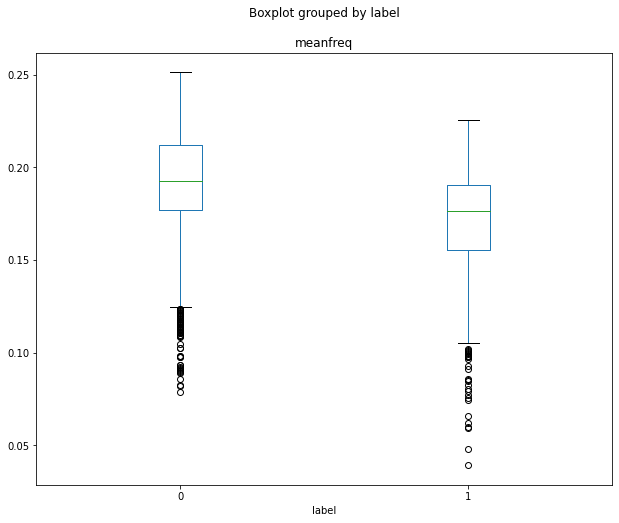

In [9]:
# BoxPlot to see how the mean frequency of voices varies by gender.
data.boxplot(by = 'label', column = ['meanfreq'], grid = False, figsize = (10,8))

# We can see that females have higher mean frequency.
# 0 - Female
# 1 - Male

In [0]:
from sklearn.model_selection import train_test_split

X = data.drop('label', axis = 1)
Y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
x_train.shape, y_train.shape

((2534, 20), (2534,))

In [15]:
x_test.shape, y_test.shape

((634, 20), (634,))

In [17]:
# Logistic Regression perform classification by fitting an S curve on your data.
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logistic_model.fit(x_train, y_train)

# penalty = 'l2'- So we have little regularization when we fit our model
# solver = 'liblinear' is good for small datasets - Optimisation algorithm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logistic_model.predict(x_test)

In [19]:
# For classification models, we use Confusion Matrix to visualize our classification results.
from sklearn.metrics import confusion_matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred)

print(ConfusionMatrix)

# Right to left Diagonal(Main Diagonal) gives us the number of predictions in our test data that out model got right.

[[257  44]
 [ 11 322]]


In [20]:
print("Training Score: ", logistic_model.score(x_train, y_train))

Training Score:  0.9100236779794791


In [21]:
# Other Metric to evaluate Classifiers

from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision Score: ", pre)
print("Recall Score: ", recall)

# Accuracy - The number of voices which were correctly clasified.
# Precision - Of all voices identified as male (Positive identifications) how many were classified correctly?
# Recall - Of all male voices in the dataset, how many were classified correctly as male?

Accuracy:  0.9132492113564669
Precision Score:  0.8797814207650273
Recall Score:  0.9669669669669669
